In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

# 데이터 불러오기

In [5]:
data = pd.read_csv("MLB_2014_2017.csv") # Test data
data.head()

,Name,Id,Age,Tm,Lg,G,PA,AB,R,H,...,HBP,SH,SF,IBB,Career,Weight,Height,AllStar,Awards,Salary
0,Jose Abreu,abreujo02,27,CHW,AL,145,622,556,80,176,...,11,0,4,15,1,255,75,2,2,8666000
1,Tony Abreu#,abreuto01,29,SFG,NL,3,4,4,0,0,...,0,0,0,0,8,200,70,0,0,0
2,Dustin Ackley*,ackledu01,26,SEA,AL,143,542,502,64,123,...,3,3,2,1,4,205,73,0,0,2600000
3,Matt Adams*,adamsma01,25,STL,NL,142,563,527,55,152,...,3,0,7,5,3,245,75,0,0,534000
4,Jim Adduci*,adducji02,29,TEX,AL,44,114,101,13,17,...,0,1,2,0,2,210,74,0,0,0


In [6]:
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1554 nVar: 35


In [7]:
data.corr()['Salary'].sort_values(ascending = False)

Salary     1.000000
AllStar    0.520477
RBI        0.488804
TB         0.471018
BB         0.470609
R          0.463080
PA         0.456205
Awards     0.455319
H          0.453671
AB         0.443354
HR         0.431900
GDP        0.418620
2B         0.410117
IBB        0.392206
G          0.382437
SF         0.365093
OPS+       0.358808
OPS        0.353867
SLG        0.339636
SO         0.333736
OBP        0.332046
Career     0.325108
BA         0.286576
HBP        0.224896
Age        0.214661
Weight     0.185250
Height     0.124394
SB         0.104463
CS         0.100894
3B         0.097971
SH        -0.122829
Name: Salary, dtype: float64

# 의미가 없다고 판단되는 변수 제거

In [8]:
data = data.drop(['Name', 'Id', 'Tm'], axis = 1) # Name, Id, Team 제거, 하지만 나중에 팀 별로 grouping 여부 체크 필요

# 리그변수 Dummify (NL = 1, AL = 0) 리그의 변동이 있었을 경우 최종 소속팀 기준으로 진행

In [9]:
data['Lg'] = data['Lg'].replace(['NL','MLB/NL','MLB/AL/NL'], 1)
data['Lg'] = data['Lg'].replace(['AL','MLB/AL','MLB/NL/AL'] ,0)
data.head()

,Age,Lg,G,PA,AB,R,H,2B,3B,HR,...,HBP,SH,SF,IBB,Career,Weight,Height,AllStar,Awards,Salary
0,27,0,145,622,556,80,176,35,2,36,...,11,0,4,15,1,255,75,2,2,8666000
1,29,1,3,4,4,0,0,0,0,0,...,0,0,0,0,8,200,70,0,0,0
2,26,0,143,542,502,64,123,27,4,14,...,3,3,2,1,4,205,73,0,0,2600000
3,25,1,142,563,527,55,152,34,5,15,...,3,0,7,5,3,245,75,0,0,534000
4,29,0,44,114,101,13,17,3,0,1,...,0,1,2,0,2,210,74,0,0,0


# NA 제거

In [10]:
data.isna().sum()

Age        0
Lg         0
G          0
PA         0
AB         0
R          0
H          0
2B         0
3B         0
HR         0
RBI        0
SB         0
CS         0
BB         0
SO         0
BA         0
OBP        0
SLG        0
OPS        0
OPS+       0
TB         0
GDP        0
HBP        0
SH         0
SF         0
IBB        0
Career     0
Weight     0
Height     0
AllStar    0
Awards     0
Salary     0
dtype: int64

In [11]:
data = data.dropna()
data = data[data['Salary'] != 0]
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1042 nVar: 32


# Salary 값 / 10000 (단위: 만 달러): Salary의 값이 float32에 맞지 않음

In [12]:
data = data.astype(np.float32)
data['Salary'] = data['Salary']/10000
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1552
Data columns (total 32 columns):
Age        1042 non-null float32
Lg         1042 non-null float32
G          1042 non-null float32
PA         1042 non-null float32
AB         1042 non-null float32
R          1042 non-null float32
H          1042 non-null float32
2B         1042 non-null float32
3B         1042 non-null float32
HR         1042 non-null float32
RBI        1042 non-null float32
SB         1042 non-null float32
CS         1042 non-null float32
BB         1042 non-null float32
SO         1042 non-null float32
BA         1042 non-null float32
OBP        1042 non-null float32
SLG        1042 non-null float32
OPS        1042 non-null float32
OPS+       1042 non-null float32
TB         1042 non-null float32
GDP        1042 non-null float32
HBP        1042 non-null float32
SH         1042 non-null float32
SF         1042 non-null float32
IBB        1042 non-null float32
Career     1042 non-null float32
We

,Age,Lg,G,PA,AB,R,H,2B,3B,HR,...,HBP,SH,SF,IBB,Career,Weight,Height,AllStar,Awards,Salary
count,1042.00000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,...,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,28.37236,0.495202,116.201538,446.028778,399.682343,53.892513,105.854126,20.860844,2.137236,13.571017,...,4.274472,1.304223,3.113244,2.738964,6.441459,211.222656,73.016312,1.380038,1.590211,614.856628
std,3.59201,0.500217,38.349197,184.436234,165.101105,27.311340,49.503609,10.759559,2.332041,10.275518,...,3.782449,2.080643,2.355250,3.614604,3.594070,19.700665,2.176797,2.123360,3.239994,659.766846
min,21.00000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,151.000000,66.000000,0.000000,0.000000,10.000000
25%,26.00000,0.000000,95.000000,309.000000,273.000000,34.000000,68.000000,13.000000,0.000000,5.000000,...,2.000000,0.000000,1.000000,0.000000,4.000000,200.000000,71.000000,0.000000,0.000000,80.000000
50%,28.00000,0.000000,127.000000,476.000000,423.000000,54.000000,110.000000,21.000000,1.000000,12.000000,...,3.000000,0.000000,3.000000,1.000000,6.000000,210.000000,73.000000,0.000000,0.000000,348.750000
75%,31.00000,1.000000,148.000000,606.000000,544.750000,73.000000,146.000000,29.000000,3.000000,20.000000,...,6.000000,2.000000,4.000000,4.000000,9.000000,222.500000,75.000000,2.000000,2.000000,900.000000
max,43.00000,1.000000,162.000000,744.000000,684.000000,137.000000,225.000000,56.000000,14.000000,59.000000,...,30.000000,13.000000,15.000000,29.000000,22.000000,275.000000,78.000000,14.000000,31.000000,3000.000000


# 설명변수와 타겟변수를 분리, 학습데이터와 평가데이터 분리

In [13]:
feature_columns = list(data.columns.difference(['Salary'])) # target을 제외한 모든 행
X = data[feature_columns] # 설명변수
y = data['Salary'] # 타겟변수
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할| 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(833, 31) (209, 31) (833,) (209,)


# 학습데이터로 학습 후 평가

In [14]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model1 = RandomForestRegressor(n_estimators = 20, # 20번 추정
                                             max_depth = 5, # 트리 최대 깊이 5
                                             random_state = 42) # 시드값 고정
model1 = random_forest_model1.fit(train_x, train_y) # 학습 진행
print(random_forest_model1.feature_importances_)
print("Accuracy on training set: {:.3f}".format(random_forest_model1.score(train_x, train_y)))
print("Accuracy on test set: {:.3f}".format(random_forest_model1.score(test_x, test_y)))

[0.00697188 0.00240423 0.00350026 0.0381704  0.36118698 0.02110064
 0.00496623 0.06979346 0.00439188 0.23168156 0.0088406  0.01792651
 0.01122099 0.00783826 0.00245681 0.01196798 0.03346579 0.00177266
 0.00966732 0.00903826 0.00509933 0.02586437 0.01587905 0.02725959
 0.01140486 0.00770285 0.00229909 0.01535602 0.00749252 0.00508639
 0.01819324]
Accuracy on training set: 0.742
Accuracy on test set: 0.435


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_pred = random_forest_model1.predict(train_x)
y_test_pred = random_forest_model1.predict(test_x)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(train_y, y_train_pred), mean_squared_error(test_y, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(train_y, y_train_pred), r2_score(test_y, y_test_pred)))

MSE train: 112650.101, test: 241268.274
R^2 train: 0.742, test: 0.435


<function matplotlib.pyplot.show(*args, **kw)>

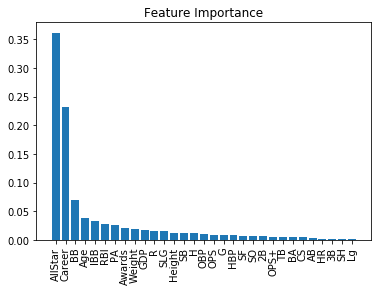

In [16]:
# Calculate feature importances
importances = random_forest_model1.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [train_x.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(train_x.shape[1]), importances[indices])
# Add feature names as x-axis lables
plt.xticks(range(train_x.shape[1]), names, rotation = 90)
# Show plot
plt.show


# Gradient Boosting Model 1

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth = 5, random_state = 42) # Default로 maximum depth = 3 ,100번 추정, learning rate = 0.1
gbrt.fit(train_x, train_y)
print(gbrt.feature_importances_)
print("Accuracy on training set: {:.3f}".format(gbrt.score(train_x, train_y)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(test_x, test_y)))

[0.0160697  0.00714692 0.0142569  0.03174893 0.28674723 0.05343906
 0.01459373 0.05427365 0.00249906 0.17622463 0.01673498 0.0179709
 0.01948699 0.01385566 0.00234114 0.00705815 0.02977323 0.00250487
 0.01486886 0.02484369 0.0155652  0.01856065 0.02317834 0.0328289
 0.02084005 0.01443742 0.00352773 0.00842405 0.02050552 0.00783746
 0.02785641]
Accuracy on training set: 0.968
Accuracy on test set: 0.385


# Random Forest Regression Randomized Search CV 1

In [43]:
import numpy as np
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

rft = RandomForestRegressor()
rft.fit(train_x, train_y)
y_pred = rft.predict(test_x)
print(mean_absolute_error(test_y, y_pred))
print((np.abs(test_y - y_pred)/(test_y)).mean())

param_dist = {
    'bootstrap': [True],
    'max_depth': [95, 100, 105],
    'max_features': ['auto'],
    'min_samples_leaf': [4, 5, 6],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [116, 120, 124, 128]
}

pre_gs_inst_bag = RandomizedSearchCV(rft,param_distributions = param_dist,
                                     cv=3,n_iter = 5,n_jobs=-1)
pre_gs_inst_bag.fit(train_x, train_y)
pre_gs_inst_bag.best_params_
results_df = get_grid_df(pre_gs_inst_bag)
group_report(results_df)

C:\Users\danny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


335.6712160521147
1.8363296929332933


C:\Users\danny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,120,0.519219,0.001391
1,param_n_estimators,124,0.522496,0.006292
2,param_n_estimators,128,0.520791,NaN
3,param_min_samples_split,4,0.522496,0.006292
4,param_min_samples_split,5,0.518235,NaN
5,param_min_samples_split,6,0.520496,0.000416
6,param_min_samples_leaf,4,0.519419,0.001940
7,param_min_samples_leaf,5,0.522590,0.006159
8,param_min_samples_leaf,6,0.520202,NaN
9,param_max_features,auto,0.520844,0.003615


# Random Forest Regression Randomized Search CV 2

In [44]:
param_dist = {
    'bootstrap': [True],
    'max_depth': [100, 105, 110],
    'max_features': ['auto'],
    'min_samples_leaf': [5],
    'min_samples_split': [5, 6, 7],
    'n_estimators': [123, 124, 125]
}

pre_gs_inst_bag = RandomizedSearchCV(rft,param_distributions = param_dist,
                                     cv=3,n_iter = 5,n_jobs=-1)
pre_gs_inst_bag.fit(train_x, train_y)
pre_gs_inst_bag.best_params_
results_df = get_grid_df(pre_gs_inst_bag)
group_report(results_df)

C:\Users\danny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,123,0.520340,0.002741
1,param_n_estimators,124,0.523442,NaN
2,param_n_estimators,125,0.522107,0.000599
3,param_min_samples_split,5,0.523442,NaN
4,param_min_samples_split,6,0.520466,0.002920
5,param_min_samples_split,7,0.521981,0.000420
6,param_min_samples_leaf,5,0.521667,0.001932
7,param_max_features,auto,0.521667,0.001932
8,param_max_depth,100,0.520922,0.003564
9,param_max_depth,105,0.522531,NaN


# Random Forest Regression with final parameter values

In [45]:
rs_rfr = RandomForestRegressor(n_estimators = 124, max_depth = 105, max_features = 'auto',
                               min_samples_leaf = 5,min_samples_split = 5, bootstrap = True)
rs_rfr.fit(train_x, train_y)
y_pred = rs_rfr.predict(test_x)
from sklearn.metrics import r2_score, mean_absolute_error
print ("R-squared",r2_score(test_y, y_pred))
print ("MAE : ",mean_absolute_error(test_y, y_pred))
print ("MAPE : ",(np.abs(test_y - y_pred)/test_y).mean())

R-squared 0.45525619403313533
MAE :  293.48491883831895
MAPE :  1.3440093261763353


<function matplotlib.pyplot.show(*args, **kw)>

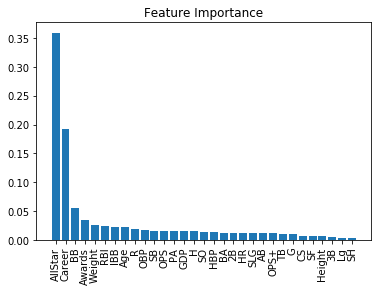

In [46]:
# Calculate feature importances
importances = rs_rfr.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [train_x.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(train_x.shape[1]), importances[indices])
# Add feature names as x-axis lables
plt.xticks(range(train_x.shape[1]), names, rotation = 90)
# Show plot
plt.show

# Gradient Boosting Regression Randomized Search CV 1

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_features' : ['log2',1.0,'auto','sqrt'],
              'max_depth' : [3, 5, 7, 10],
              'min_samples_leaf' : [2, 3, 5, 10],
              'n_estimators': [50, 100, 150, 200, 250, 300],
              'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
              'loss' : ['ls','huber']
}
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
                                 param_distributions = param_dist,
                                 cv=3,n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(train_x, train_y)
y_pred = pre_gs_inst.predict(test_x)
from sklearn.metrics import r2_score, mean_absolute_error
print ("R-squared",r2_score(test_y, y_pred))
print ("MAE : ",mean_absolute_error(test_y, y_pred))
print ("MAPE : ",(np.abs(test_y - y_pred)/test_y).mean())

C:\Users\danny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


R-squared 0.40946677494717276
MAE :  311.6535277618676
MAPE :  1.31499580258722


# Create a function that prints grid report

In [37]:
import numpy as np
import pandas as pd
def get_grid_df(fitted_gs_estimator):
    res_dict = fitted_gs_estimator.cv_results_
    results_df = pd.DataFrame()
    for key in res_dict.keys():
        results_df[key] = res_dict[key]
    return results_df
def group_report(results_df):
    param_cols = [x for x in results_df.columns if 'param' in x and x is not 'params']
    focus_cols = param_cols + ['mean_test_score']
    print ("Grid CV Report \n")
    output_df = pd.DataFrame(columns = ['param_type','param_set','mean_score','mean_std'])
    cc = 0
    for param in param_cols:
        for key,group in results_df.groupby(param):
            output_df.loc[cc] = (param, key, group['mean_test_score'].mean(), group['mean_test_score'].std())
            cc += 1
    return output_df

In [48]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.333051,0.298518
1,param_n_estimators,100,0.319188,0.276530
2,param_n_estimators,150,0.235028,0.339180
3,param_n_estimators,200,0.115983,0.335252
4,param_n_estimators,250,0.357208,0.162970
5,param_n_estimators,300,0.356333,0.175638
6,param_min_samples_leaf,2,0.254551,0.297262
7,param_min_samples_leaf,3,0.298331,0.165099
8,param_min_samples_leaf,5,0.287924,0.254501
9,param_min_samples_leaf,10,0.446707,0.118319


# Gradient Boosting Regression Randomized Search CV 2

In [39]:
param_dist = {'max_features' : ['sqrt','log2'],
              'max_depth' : [4, 5, 6],
              'min_samples_leaf' : [2, 5],
              'n_estimators': [190, 200, 210],
              'learning_rate' : [0.04,0.05,0.06],
              'loss' : ['ls']
}
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
                                 param_distributions = param_dist,
                                 cv=3, n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(train_x, train_y)
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

C:\Users\danny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,190,0.503491,0.004797
1,param_n_estimators,200,0.502594,0.009558
2,param_n_estimators,210,0.501083,0.007856
3,param_min_samples_leaf,2,0.499657,0.006776
4,param_min_samples_leaf,5,0.503747,0.007517
5,param_max_features,log2,0.501651,0.009303
6,param_max_features,sqrt,0.503513,0.004628
7,param_max_depth,4,0.508152,0.006295
8,param_max_depth,5,0.500291,0.006723
9,param_max_depth,6,0.500689,0.007312


# Gradient Boosting Regression with final parameter values

In [41]:
rs_gbt = GradientBoostingRegressor(warm_start=True, max_features = 'sqrt', min_samples_leaf = 5, learning_rate = 0.04,
                                   max_depth = 4, n_estimators = 190, loss = 'ls')
rs_gbt.fit(train_x, train_y)
y_pred = rs_gbt.predict(test_x)
from sklearn.metrics import r2_score, mean_absolute_error
print ("R-squared",r2_score(test_y, y_pred))
print ("MAE : ",mean_absolute_error(test_y, y_pred))
print ("MAPE : ",(np.abs(test_y - y_pred)/test_y).mean())

R-squared 0.4410667182989839
MAE :  298.7645544416975
MAPE :  1.3896190683697986


<function matplotlib.pyplot.show(*args, **kw)>

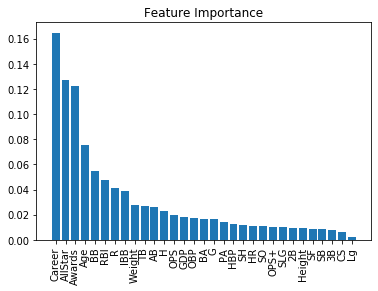

In [49]:
# Calculate feature importances
importances = rs_gbt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [train_x.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(train_x.shape[1]), importances[indices])
# Add feature names as x-axis lables
plt.xticks(range(train_x.shape[1]), names, rotation = 90)
# Show plot
plt.show

# Ada Boosting Regression Randomized Search CV 1

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [50, 100],'learning_rate' : [0.01,0.05,0.1,0.3,1],
              'loss' : ['linear', 'square', 'exponential']}
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),param_distributions = param_dist,
                                 cv=3,n_iter = 10,n_jobs=-1)
pre_gs_inst.fit(train_x, train_y)
pre_gs_inst.best_params_
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

C:\Users\danny\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,50,0.466747,0.028049
1,param_n_estimators,100,0.440964,0.082308
2,param_loss,exponential,0.480090,0.024174
3,param_loss,linear,0.432717,0.087362
4,param_loss,square,0.428831,NaN
5,param_learning_rate,0.01,0.488315,0.006539
6,param_learning_rate,0.05,0.493144,0.008208
7,param_learning_rate,0.1,0.447265,0.026070
8,param_learning_rate,0.3,0.443316,0.003210
9,param_learning_rate,1,0.280380,NaN


# Ada Boosting Regression Randomized Search CV 2

In [54]:
param_dist = {'n_estimators': [40, 50, 60, 70, 80, 90, 100],'learning_rate' : [0.04,0.05,0.06],
              'loss' : ['exponential']}
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),param_distributions = param_dist,
                                 cv=3,n_iter = 10,n_jobs=-1)
pre_gs_inst.fit(train_x, train_y)
pre_gs_inst.best_params_
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_n_estimators,40,0.485249,NaN
1,param_n_estimators,50,0.493114,NaN
2,param_n_estimators,70,0.488985,0.004532
3,param_n_estimators,80,0.492052,0.001980
4,param_n_estimators,90,0.495718,NaN
5,param_n_estimators,100,0.490117,0.004000
6,param_loss,exponential,0.490651,0.003767
7,param_learning_rate,0.04,0.492485,0.001019
8,param_learning_rate,0.05,0.491658,0.005212
9,param_learning_rate,0.06,0.487198,0.002999


# Ada Boosting Regression with final parameter values

In [60]:
rs_ada = AdaBoostRegressor(n_estimators = 90, learning_rate = 0.04, loss = 'exponential')
rs_ada.fit(train_x, train_y)
y_pred = rs_ada.predict(test_x)
from sklearn.metrics import r2_score, mean_absolute_error
print ("R-squared",r2_score(test_y, y_pred))
print ("MAE : ",mean_absolute_error(test_y, y_pred))
print ("MAPE : ",(np.abs(test_y - y_pred)/test_y).mean())

R-squared 0.4627277300132163
MAE :  317.7939603519045
MAPE :  1.8146300739055308
